<a href="https://colab.research.google.com/github/Fecarvalho00/Segmentacao_de_Clientes/blob/main/Segmentacao_de_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## O que é uma segmentação de clientes?

In [34]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos DS/Agrupamento de Clientes/Test.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos DS/Agrupamento de Clientes/Test.csv')

In [ ]:
df_test.head()

In [4]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [8]:
df.drop(columns = [ 'ID', 'Var_1'], inplace = True)




In [9]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0
2,Female,Yes,69,No,NaN,0.0,Low,1.0
3,Male,Yes,59,No,Executive,11.0,High,2.0
4,Female,No,19,No,Marketing,NaN,Low,4.0


In [ ]:
df.info

In [13]:
df.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
dtype: object

In [10]:
print(df.isna().sum())


Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
dtype: int64


In [12]:
for i in df.columns:
    print('Nome da coluna {}'.format(i))
    print(df[i].unique())
    print('Numero de valores na coluna {} é {}'.format( i , df[i].nunique()))
    print('---------')

Nome da coluna Gender
['Female' 'Male']
Numero dos valores na coluna Gender é 2
---------
Nome da coluna Ever_Married
['Yes' 'No' nan]
Numero dos valores na coluna Ever_Married é 2
---------
Nome da coluna Age
[36 37 69 59 19 47 61 50 22 27 18 20 45 55 88 63 42 79 35 52 29 87 89 31
 72 41 62 56 60 68 57 51 86 74 23 80 78 48 70 83 73 46 43 32 39 71 67 49
 65 33 58 30 21 26 81 28 76 85 66 53 40 25 77 75 82 84 38]
Numero dos valores na coluna Age é 67
---------
Nome da coluna Graduated
['Yes' 'No' nan]
Numero dos valores na coluna Graduated é 2
---------
Nome da coluna Profession
['Engineer' 'Healthcare' nan 'Executive' 'Marketing' 'Doctor' 'Artist'
 'Lawyer' 'Entertainment' 'Homemaker']
Numero dos valores na coluna Profession é 9
---------
Nome da coluna Work_Experience
[ 0.  8. 11. nan  5.  1.  2.  9.  3.  6.  7.  4. 13. 10. 12. 14.]
Numero dos valores na coluna Work_Experience é 15
---------
Nome da coluna Spending_Score
['Low' 'Average' 'High']
Numero dos valores na coluna Spending_Sc

In [14]:
df.dropna(subset = ['Profession'] , inplace = True)

In [19]:
#Ever_Married preencher com 'No'
df['Ever_Married'] = df['Ever_Married'].fillna('No')

#Gratuated preencher com 'No'
df['Graduated'] = df['Graduated'].fillna('No')

#Work_Experience preencher com '0'
df['Work_Experience'] = df['Work_Experience'].fillna(0)

#Family_size Preencher com '0'
df['Family_Size'] = df['Family_Size'].fillna(1)


In [22]:
df.shape

(2589, 8)

#Análise Exploratória dos dados

<Axes: xlabel='Spending_Score', ylabel='count'>

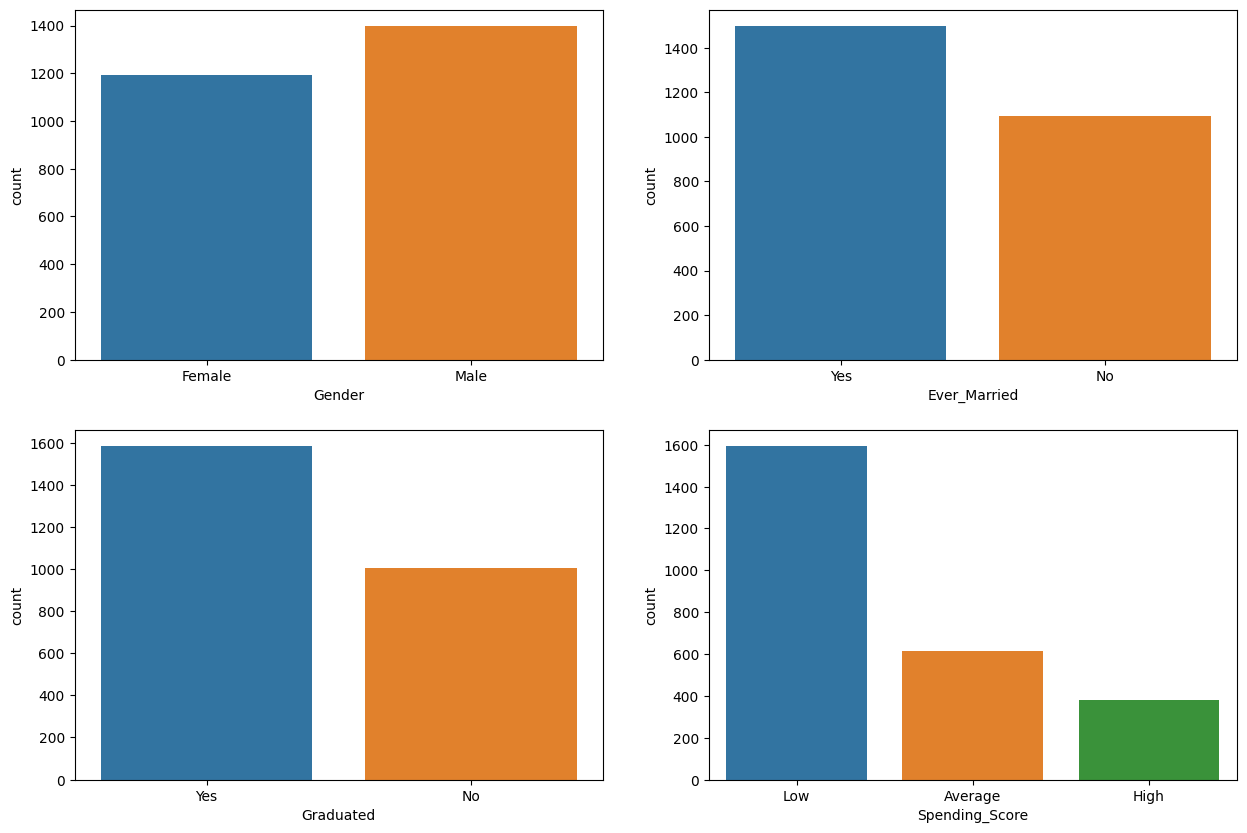

In [25]:
fig = plt.figure( figsize = (15,10))

plt.subplot(2,2,1)
sns.countplot( x = 'Gender', data = df)

plt.subplot(2,2,2)
sns.countplot( x = 'Ever_Married', data = df)

plt.subplot(2,2,3)
sns.countplot( x = 'Graduated', data = df)

plt.subplot(2,2,4)
sns.countplot( x = 'Spending_Score', data = df)

Artist           802
Healthcare       418
Entertainment    301
Doctor           242
Engineer         236
Lawyer           221
Executive        176
Marketing        111
Homemaker         82
Name: Profession, dtype: int64


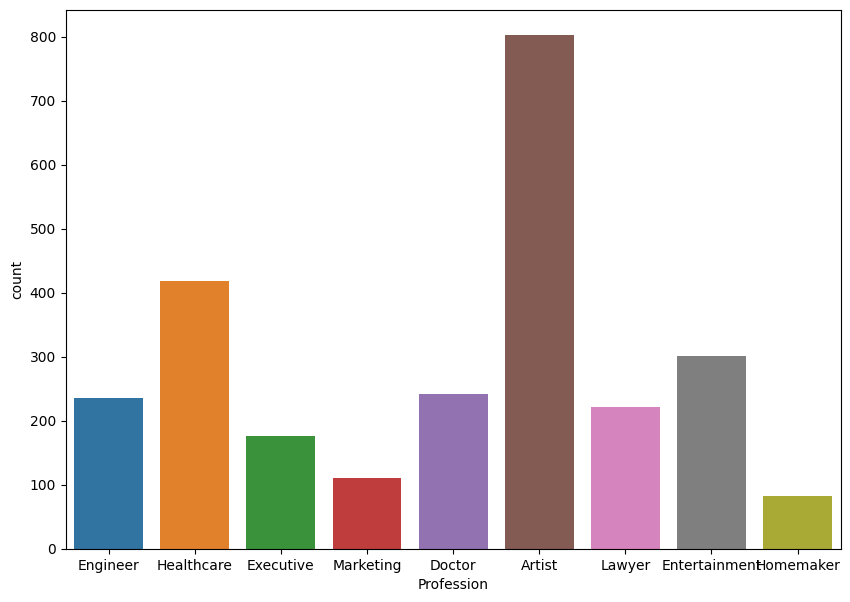

In [31]:
plt.figure(figsize = (10,7))
sns.countplot( x = 'Profession', data = df)
print(df['Profession'].value_counts())
plt.show()

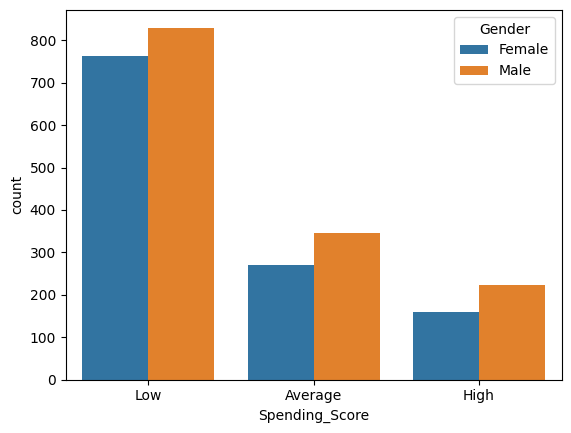

In [32]:
sns.countplot(x = 'Spending_Score', hue = 'Gender', data = df)
plt.show()

<Axes: xlabel='Spending_Score', ylabel='count'>

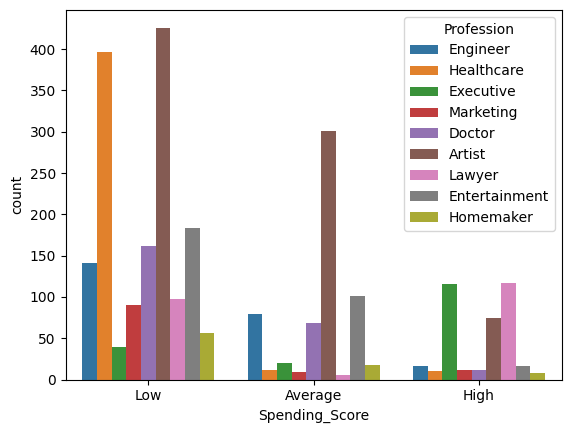

In [33]:
sns.countplot(x = 'Spending_Score', hue = 'Profession', data = df)